## **1. Installation**

Git clone repositorie and install libraries

In [ ]:
!git clone https://github.com/WevertonGomesCosta/Pig-weight-calculation-by-Mask-R-CNN-Keras-and-TensorFlow.git
!pip install tensorflow-gpu==1.15.2
!pip install keras==2.1.5
!pip install h5py==2.10.0
%matplotlib inline

Cloning into 'Pig-weight-calculation-by-Mask-R-CNN-Keras-and-TensorFlow'...
remote: Enumerating objects: 1069, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 1069 (delta 26), reused 97 (delta 14), pack-reused 957
Receiving objects: 100% (1069/1069), 143.37 MiB | 32.66 MiB/s, done.
Resolving deltas: 100% (585/585), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410.9 MB 29 kB/s 
     |████████████████████████████████| 503 kB 44.2 MB/s 
     |████████████████████████████████| 3.8 MB 31.8 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=1bff48e17898fd1fb4ee07ed0f4a6da29324c1f92f0194b7ca257d570c501807
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  A

## **2. Root path and functions**
Declare root path and import functions on m_rcnn

In [ ]:
import sys
sys.path.append("/content/Pig-weight-calculation-by-Mask-R-CNN-Keras-and-TensorFlow/mrcnn")
from m_rcnn import *

Using TensorFlow backend.


... done downloading pretrained model!


## **3. Image Dataset**

Load your images and annotated dataset


In [ ]:
images_path = '/content/Pig-weight-calculation-by-Mask-R-CNN-Keras-and-TensorFlow/images'
annotations_path = "/content/Pig-weight-calculation-by-Mask-R-CNN-Keras-and-TensorFlow/annotations2.json"
dataset_train = load_image_dataset(os.path.join(annotations_path), images_path, "train")
dataset_val = load_image_dataset(os.path.join(annotations_path), images_path, "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/Pig-weight-calculation-by-Mask-R-CNN-Keras-and-TensorFlow/annotations2.json
Annotation json path:  /content/Pig-weight-calculation-by-Mask-R-CNN-Keras-and-TensorFlow/annotations2.json
Train: 56
Validation: 6
Classes: 1


Load image samples

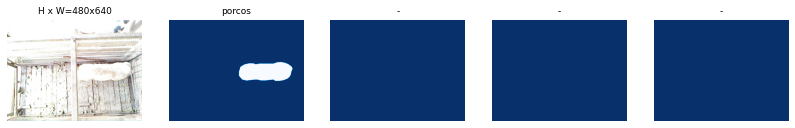

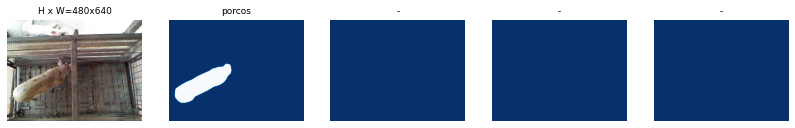

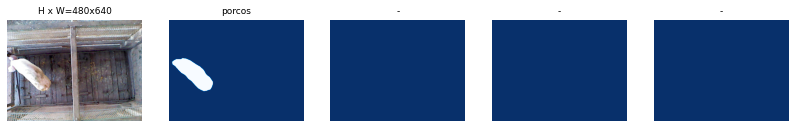

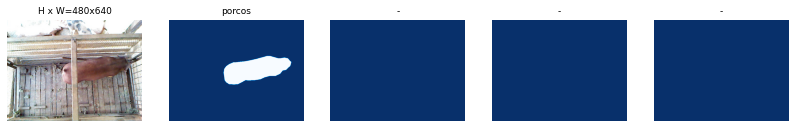

In [ ]:
display_image_samples(dataset_train)

## **4. Training**

Train Mask RCNN on your custom Dataset.

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


/content/Pig-weight-calculation-by-Mask-R-CNN-Keras-and-TensorFlow/mask_rcnn_coco.h5


In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Pig-weight-calculation-by-Mask-R-CNN-Keras-and-TensorFlow/logs/object20220914T1517/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_

Epoch 1/5
 89/500 [====>.........................] - ETA: 4:34:12 - loss: 1.2429 - rpn_class_loss: 0.0111 - rpn_bbox_loss: 0.6012 - mrcnn_class_loss: 0.0824 - mrcnn_bbox_loss: 0.3832 - mrcnn_mask_loss: 0.1650

## **5. Save your model**

Save your model training in "mask_rcnn_shapes.h5"

In [ ]:
model_path = os.path.join(ROOT_DIR, "mask_rcnn_shapes.h5")
model.keras_model.save_weights(model_path)

## **6. Detection (test your model on a random image)**

In [ ]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)

Loading weights from  /content/Pig-weight-calculation-by-Mask-R-CNN-Keras-and-TensorFlow/mask_rcnn_shapes.h5


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


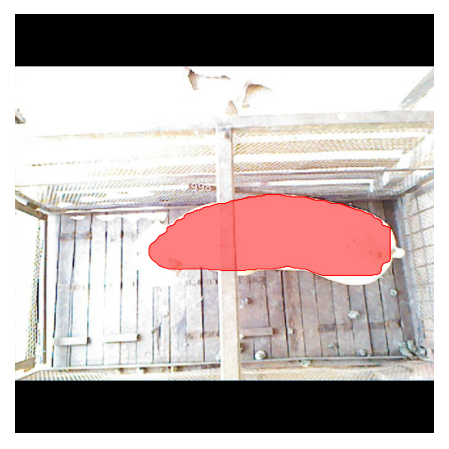

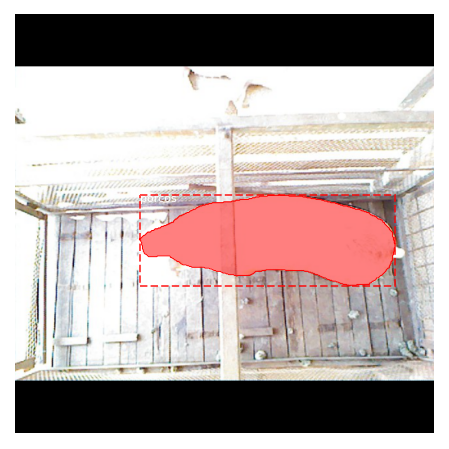

In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

## **7. Run Mask-RCNN on Images**

You can load here the image and extract the mask using Mask-RCNN


In [ ]:
import os
import glob
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from visualize import *

files_images=[]
path_images = '/content/Pig-weight-calculation-by-Mask-R-CNN-Keras-and-TensorFlow/images'
images = pd.DataFrame([f for f in glob.glob(path_images + "**/*.jpg", recursive=True)], columns = ['Name'])
n_rows = images.shape[0]

Here, you can calculate the area. Only assign a value if you know the actual size of objects.

In [ ]:
RATIO_PIXEL_TO_CM_h = 2.4 # 2.4 pixels are 1cm
RATIO_PIXEL_TO_CM_w = 2.9
RATIO_PIXEL_TO_SQUARE_CM = RATIO_PIXEL_TO_CM_h * RATIO_PIXEL_TO_CM_w
results = {}

Now, let's create a loop for each image and calculate the size of the pigs.

In [ ]:
for i in range(n_rows):
  # Save image in img
  img = cv2.imread(images.loc[i, "Name"])
  #cv2_imshow(img)
  # Created box
  img_box = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  #Colors to class
  class_names = ["BG", "green", "blue", "light blue", "pink"]
  colors = random_colors(len(class_names))

  # Get objects mask
  class_ids, boxes, masks = detect_contours_maskrcnn(test_model, img)

  for class_id, box, object_contours in zip(class_ids, boxes, masks):
      # 1. Creted polylines Box to calculate size of the pigs
      y1, x1, y2, x2 = box
      #cv2.rectangle(img, (x1, y1), (x2, y2), colors[class_id], 15)
      cv2.polylines(img, [object_contours], True, colors[class_id], 2)
      img = draw_mask(img, [object_contours], colors[class_id])

      # 2. Calculate area
      area_px = cv2.contourArea(object_contours)
      area_cm = round(area_px / RATIO_PIXEL_TO_SQUARE_CM, 2)

      # 3. Calculate perimeter
      perimeter_px = cv2.arcLength(object_contours, True)
      perimeter_cm = round((perimeter_px *  600)/1640,2)

      # 4. Calculate length
      rect = cv2.minAreaRect(object_contours)
      box = cv2.boxPoints(rect)
      box = np.int0(box)
      cv2.drawContours(img, [box], 0, (0,255,0), 2) # this was mostly for debugging you may omit
      (x, y), (w, h), angle = rect
      
      # 5. Get Width and Height of the Objects by applying the Ratio pixel to cm

      object_width = round(w* 600/ 1640,2)
      object_height = round(h *600/ 1640 ,2)

      # 6. Add informations in the images
      cv2.putText(img, "Nome: {}".format(images.loc[i, "Name"][74:-4]), (0, 300), cv2.FONT_HERSHEY_PLAIN, 2, colors[class_id], 2)
      cv2.putText(img, "A: {}cm^2".format(round(area_px,2)), (0, 250), cv2.FONT_HERSHEY_PLAIN, 2, colors[class_id], 2)
      cv2.putText(img, "P: {}cm".format(round(perimeter_px,2)), (0, 200), cv2.FONT_HERSHEY_PLAIN,2, colors[class_id], 2)
      cv2.putText(img, "C: {}cm".format(round(h,2)), (0, 150), cv2.FONT_HERSHEY_PLAIN, 2, colors[class_id], 2)
      cv2.putText(img, "L: {}cm".format(round(w,2)), (0, 100), cv2.FONT_HERSHEY_PLAIN, 2, colors[class_id], 2)
      
      # 7. Save informations in the results
      results[i] = {"Nome": images.loc[i, "Name"][74:-4],
                    "Area_cm": area_cm,
                    "Perimetro_cm":perimeter_cm,
                    "Largura_cm": object_height,
                    "Comprimento_cm":object_width,
                    "Area_px": area_px,
                    "Perimetro_px":perimeter_px,
                    "Largura_px": w,
                    "Comprimento_px":h}
  # Plot image
  cv2_imshow(img)

Save results 

In [ ]:
results =  pd.DataFrame(data=results)
results
writer = pd.ExcelWriter('results.xlsx')
results.to_excel(writer,'Sheet1')
writer.save()

#Export results
from google.colab import files
files.download("/content/results.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **8. Inference Mask-RCNN on Images**

You can load here the image and extract the mask using Mask-RCNN

In [ ]:
import os
import pandas as pd
resultsfiles_images=[]
path_images = '/content/Pig-weight-calculation-by-Mask-R-CNN-Keras-and-TensorFlow/images'
images = pd.DataFrame(os.listdir(path_images), columns = ['Name'])
n_rows = images.shape[0]

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

RATIO_PIXEL_TO_CM_h = 2.4 # 2.4 pixels are 1cm
RATIO_PIXEL_TO_CM_w = 2.9
RATIO_PIXEL_TO_SQUARE_CM = RATIO_PIXEL_TO_CM_h * RATIO_PIXEL_TO_CM_w

results = {}

We can load the calculated weights and now if we have more images we can insert them into the inference model to get their measurements.

In [ ]:
# Model inference
test_model, inference_config = load_inference_model(1, "/content/Pig-weight-calculation-by-Mask-R-CNN-Keras-and-TensorFlow/mask_rcnn_shapes.h5")

Loading weights from  /content/Pig-weight-calculation-by-Mask-R-CNN-Keras-and-TensorFlow/mask_rcnn_shapes.h5


In [ ]:
for i in range(n_rows):

  img = cv2.imread(os.path.join(path_images, images.loc[i, "Name"]))

  img_box = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  class_names = ["BG", "green", "blue", "light blue", "pink"]
  colors = random_colors(len(class_names))

  image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Detect results
  r = test_model.detect([image])[0]
  colors = random_colors(80)

  # Get Coordinates and show it on the image
  object_count = len(r["class_ids"])
  for j in range(object_count):
      # 1. Mask
      mask = r["masks"][:, :, j]
      contours = get_mask_contours(mask)
      for cnt in contours:
          cv2.polylines(img, [cnt], True, colors[j], 2)
          img = draw_mask(img, [cnt], colors[j])
          # 2. Calculate area
          area_px = cv2.contourArea(cnt)
          area_cm = round(area_px / RATIO_PIXEL_TO_SQUARE_CM, 2)

          # 3. Calculate perimeter
          perimeter_px = cv2.arcLength(cnt, True)
          perimeter_cm = round((perimeter_px *  600)/1640,2)

          # 4. Calculate length
          rect = cv2.minAreaRect(cnt)
          box = cv2.boxPoints(rect)
          box = np.int0(box)
          cv2.drawContours(img, [box], 0, colors[j], 2) # this was mostly for debugging you may omit
          (x, y), (w, h), angle = rect
          if (w > h):
              C_px = object_width
              L_px = object_height
          if (h > w):
              L_px = object_width
              C_px = object_height
          
          object_width = round(w* 600/ 1640,2)
          object_height = round(h *600/ 1640 ,2)

          if (object_width > object_height):
              C_cm = object_width
              L_cm = object_height
          if (object_height > object_width):
              L_cm = object_width
              C_cm = object_height
          
          peso = 
          # 5. write in image
          cv2.putText(img, "Nome: {}".format(images.loc[i, "Name"]), (0, 350), cv2.FONT_HERSHEY_PLAIN, 2, colors[j], 2)
          cv2.putText(img, "Peso predito: {}".format(round(peso,2)), (0, 300), cv2.FONT_HERSHEY_PLAIN, 2, colors[j], 2)
          cv2.putText(img, "A: {}cm^2".format(round(area_cm,2)), (0, 250), cv2.FONT_HERSHEY_PLAIN, 2, colors[j], 2)
          cv2.putText(img, "P: {}cm".format(round(perimeter_cm,2)), (0, 200), cv2.FONT_HERSHEY_PLAIN,2, colors[j], 2)
          cv2.putText(img, "C: {}cm".format(round(C_cm,2)), (0, 150), cv2.FONT_HERSHEY_PLAIN, 2, colors[j], 2)
          cv2.putText(img, "L: {}cm".format(round(L_cm,2)), (0, 100), cv2.FONT_HERSHEY_PLAIN, 2, colors[j], 2)

          results[i] = {"Nome": images.loc[i, "Name"],
                        "Area_cm": area_cm,
                        "Perimetro_cm":perimeter_cm,
                        "Largura_cm": L_cm,
                        "Comprimento_cm":C_cm,
                        "Area_px": area_px,
                        "Perimetro_px":perimeter_px,
                        "Largura_px": L_px,
                        "Comprimento_px":C_px,
                        "Peso_Predito": peso}

          cv2_imshow(img)

NameError: ignored

In [ ]:
results =  pd.DataFrame(data=results)
results
writer = pd.ExcelWriter('results.xlsx')
results.to_excel(writer,'Sheet1')
writer.save()